In [29]:
!pip install pyreadstat
!pip install sweetviz
!pip install econtools

     |████████████████████████████████| 542kB 4.1MB/s 


In [17]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dtafile = '/content/Teste_t_Duas_Amostras_Independentes.dta'
df, meta = pyreadstat.read_dta(dtafile)

In [ ]:
df.head()

,fornecedor,tempo
0,1,22.799999
1,1,23.400000
2,1,26.200001
3,1,24.299999
4,1,22.000000


In [ ]:
df.to_excel('teste_t_amostras_independentes.xlsx')

In [5]:
dtafile = '/content/Tempodistsemperperfil.dta'
dframe_arquivo, meta = pyreadstat.read_dta(dtafile)

In [7]:
dframe_arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   estudante  10 non-null     object
 1   tempo      10 non-null     int64 
 2   dist       10 non-null     int64 
 3   sem        10 non-null     int64 
 4   per        10 non-null     int64 
 5   perfil     10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


In [15]:
dframe_arquivo

,estudante,tempo,dist,sem,per,perfil
0,Gabriela,15,8,0,1,1
1,Dalila,20,6,1,1,2
2,Gustavo,20,15,0,1,2
3,Letícia,40,20,1,0,3
4,Luiz Ovídio,50,25,2,0,3
5,Leonor,25,11,1,1,2
6,Ana,10,5,0,1,1
7,Antônio,55,32,3,0,1
8,Júlia,35,28,1,1,2
9,Mariana,30,20,1,1,2


In [21]:
dframe_with_dummies = pd.concat([dframe_arquivo, pd.get_dummies(dframe_arquivo['perfil'])], axis=1)

In [22]:
dframe_with_dummies

,estudante,tempo,dist,sem,per,perfil,1,2,3
0,Gabriela,15,8,0,1,1,1,0,0
1,Dalila,20,6,1,1,2,0,1,0
2,Gustavo,20,15,0,1,2,0,1,0
3,Letícia,40,20,1,0,3,0,0,1
4,Luiz Ovídio,50,25,2,0,3,0,0,1
5,Leonor,25,11,1,1,2,0,1,0
6,Ana,10,5,0,1,1,1,0,0
7,Antônio,55,32,3,0,1,1,0,0
8,Júlia,35,28,1,1,2,0,1,0
9,Mariana,30,20,1,1,2,0,1,0


In [27]:
dframe_arquivo.corr()

,tempo,dist,sem,per,perfil
tempo,1.000000,0.905221,0.909155,-0.848668,0.404061
dist,0.905221,1.000000,0.755914,-0.628856,0.269177
sem,0.909155,0.755914,1.000000,-0.731925,0.159719
per,-0.848668,-0.628856,-0.731925,1.000000,-0.405262
perfil,0.404061,0.269177,0.159719,-0.405262,1.000000


In [19]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(dframe_arquivo)
#display the report
advert_report.show_html('Advertising.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
#Importing necessary packages
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import math
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

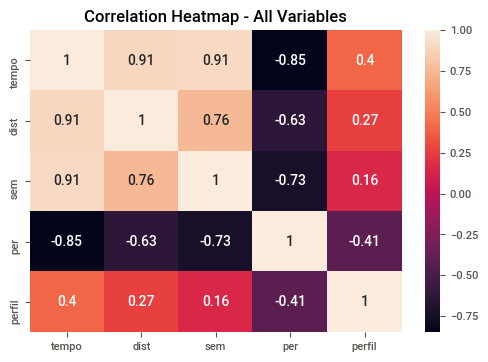

In [35]:
#Analyzing correlation
sns.heatmap(dframe_arquivo.corr(), annot=True)
plt.title('Correlation Heatmap - All Variables')
plt.savefig('Correlation Heatmap - All Variables.png')

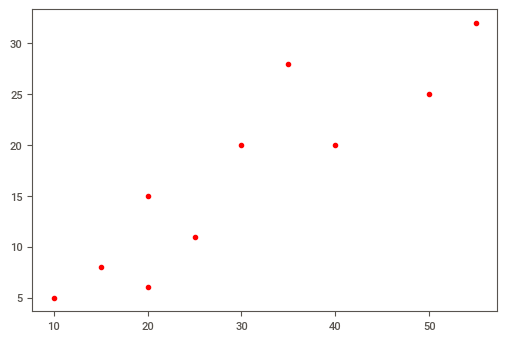

In [39]:
#Checking linearity between features and target - Open AAPL vs. High_AAPL
plt.scatter(dframe_arquivo['tempo'], dframe_arquivo['dist'], color='red')
plt.show()

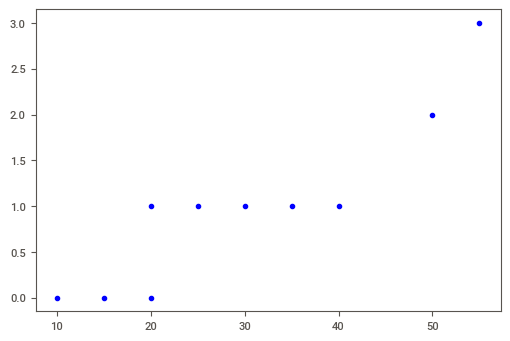

In [40]:
#Checking linearity between features and target - Open AAPL vs. High_AAPL
plt.scatter(dframe_arquivo['tempo'], dframe_arquivo['sem'], color='blue')
plt.show()

In [42]:
#Separating features and target on the training
X = dframe_arquivo[['dist','sem','per']]
Y = dframe_arquivo['tempo']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 19.63527675835192
Coefficients: 
 [ 0.70844841  5.25727366 -9.90881919]


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
dframe_with_dummies.head()

,estudante,tempo,dist,sem,per,perfil,1,2,3
0,Gabriela,15,8,0,1,1,1,0,0
1,Dalila,20,6,1,1,2,0,1,0
2,Gustavo,20,15,0,1,2,0,1,0
3,Letícia,40,20,1,0,3,0,0,1
4,Luiz Ovídio,50,25,2,0,3,0,0,1


In [52]:
dframe_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   estudante  10 non-null     object
 1   tempo      10 non-null     int64 
 2   dist       10 non-null     int64 
 3   sem        10 non-null     int64 
 4   per        10 non-null     int64 
 5   perfil     10 non-null     int64 
 6   1          10 non-null     uint8 
 7   2          10 non-null     uint8 
 8   3          10 non-null     uint8 
dtypes: int64(5), object(1), uint8(3)
memory usage: 638.0+ bytes


In [64]:
Xs = dframe_with_dummies.drop(['perfil','tempo','estudante'], axis=1)
y = dframe_with_dummies['tempo']
reg = LinearRegression()
reg.fit(Xs, y)
print(reg.intercept_)
print(reg.coef_)

16.20769465915543
[ 0.6740469   6.6467968  -5.3714136  -2.71758592 -0.93846893  3.65605485]


In [66]:
Xs

,dist,sem,per,1,2,3
0,8,0,1,1,0,0
1,6,1,1,0,1,0
2,15,0,1,0,1,0
3,20,1,0,0,0,1
4,25,2,0,0,0,1
5,11,1,1,0,1,0
6,5,0,1,1,0,0
7,32,3,0,1,0,0
8,28,1,1,0,1,0
9,20,1,1,0,1,0


In [76]:
X = np.column_stack((dframe_with_dummies['dist'], dframe_with_dummies['sem'], dframe_with_dummies['per'],dframe_with_dummies[1],dframe_with_dummies[2],dframe_with_dummies[3]))
y = dframe_with_dummies['tempo']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     264.1
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           3.98e-05
Time:                        21:57:34   Log-Likelihood:                -11.668
No. Observations:                  10   AIC:                             35.34
Df Residuals:                       4   BIC:                             37.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1558      2.690      4.519      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
